In [17]:
import glob
import io
import itertools
import json
import re
import string
from collections import Counter

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import regex as re
import tensorflow as tf
import torch_geometric
import tqdm
from keras.layers import Embedding, TextVectorization
from nltk import word_tokenize
from nltk.corpus import wordnet as wn

nltk.download('wordnet')
nltk.download('omw-1.4')

SEED = 42
AUTOTUNE = tf.data.experimental.AUTOTUNE
%load_ext tensorboard
import io

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/xavierevans/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/xavierevans/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Import Metadata

In [3]:
path = "/Users/xavierevans/nasa/metadata"
json_files = glob.glob(path + "/*.json")

In [4]:
json_keys = []
for file in json_files:
    with open(file) as f:
        data = json.load(f)
        json_keys += data.keys()
json_keys = list(set(json_keys))

In [5]:
json_values = []
for file in json_files:
    with open(file) as f:
        data = json.load(f)
        json_values.append(
            [data[key] if key in data.keys() else None for key in json_keys]
        )

In [6]:
df = pd.DataFrame(json_values, columns=json_keys)

In [7]:
columns = df.columns

In [33]:
column_number = 24
print(columns[column_number])
print(df[columns[column_number]][10])

Abstract
Version 5 is the current version of the data set. Older versions are no longer available and have been superseded by Version 5.

The "CLIM"  products differ from their "regular" counterparts (without the "CLIM" in the name) by the ancillary data they use. They are Climate-Reference products, which requires homogeneous ancillary data over the climate time series.  Hence, the ECMWF-Interim (European Centre for Medium-Range Weather Forecasts, 2-3 months lag behind the regular production) reanalysis is used as ancillary data to derive surface and atmospheric conditions required by the GPROF algorithm for the "CLIM" output. The GPROF databases are also adjusted accordingly for these climate-referenced retrievals.

The 2AGPROF (also known as, GPM GPROF (Level 2)) algorithm retrieves consistent precipitation and related science fields from the following GMI and partner passive microwave sensors: GMI, SSMI (DMSP F15), SSMIS (DMSP F16, F17, F18) AMSR2 (GCOM-W1), TMI MHS (NOAA 18&19, ME

In [8]:
keep = ["EntryTitle"]

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.transforms as T
import umap.umap_ as umap
from sklearn.linear_model import LogisticRegression
from torch_cluster import random_walk
from torch_geometric.datasets import Planetoid
from torch_geometric.loader import NeighborSampler as RawNeighborSampler
from torch_geometric.nn import SAGEConv

/Users/xavierevans/nasa/environment/miniforge3/envs/nasa/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
dataset = "Cora"
path = "./data"
dataset = Planetoid(path, dataset, transform=T.NormalizeFeatures())
data = dataset[0]
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [30]:
torch.set_printoptions(profile="full")
print(data.y)

tensor([3, 4, 4, 0, 3, 2, 0, 3, 3, 2, 0, 0, 4, 3, 3, 3, 2, 3, 1, 3, 5, 3, 4, 6,
        3, 3, 6, 3, 2, 4, 3, 6, 0, 4, 2, 0, 1, 5, 4, 4, 3, 6, 6, 4, 3, 3, 2, 5,
        3, 4, 5, 3, 0, 2, 1, 4, 6, 3, 2, 2, 0, 0, 0, 4, 2, 0, 4, 5, 2, 6, 5, 2,
        2, 2, 0, 4, 5, 6, 4, 0, 0, 0, 4, 2, 4, 1, 4, 6, 0, 4, 2, 4, 6, 6, 0, 0,
        6, 5, 0, 6, 0, 2, 1, 1, 1, 2, 6, 5, 6, 1, 2, 2, 1, 5, 5, 5, 6, 5, 6, 5,
        5, 1, 6, 6, 1, 5, 1, 6, 5, 5, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 4, 3, 0, 3,
        6, 6, 0, 3, 4, 0, 3, 4, 4, 1, 2, 2, 2, 3, 3, 3, 3, 0, 4, 5, 0, 3, 4, 3,
        3, 3, 2, 3, 3, 2, 2, 6, 1, 4, 3, 3, 3, 6, 3, 3, 3, 3, 0, 4, 2, 2, 6, 5,
        3, 5, 4, 0, 4, 3, 4, 4, 3, 3, 2, 4, 0, 3, 2, 3, 3, 4, 4, 0, 3, 6, 0, 3,
        3, 4, 3, 3, 5, 2, 3, 2, 4, 1, 3, 2, 2, 3, 3, 3, 3, 5, 1, 3, 1, 3, 5, 0,
        3, 5, 0, 4, 2, 4, 2, 4, 4, 5, 4, 3, 5, 3, 3, 4, 3, 0, 4, 5, 0, 3, 6, 2,
        5, 5, 5, 3, 2, 3, 0, 4, 5, 3, 0, 4, 0, 3, 3, 0, 0, 3, 5, 4, 4, 3, 4, 3,
        3, 2, 2, 3, 0, 3, 1, 3, 2, 3, 3,

In [11]:
class NeighborSampler(RawNeighborSampler):
    def sample(self, batch):
        batch = torch.tensor(batch)
        row, col, _ = self.adj_t.coo()

        # For each node in `batch`, we sample a direct neighbor (as positive
        # example) and a random node (as negative example):
        pos_batch = random_walk(row, col, batch, walk_length=1, coalesced=False)[:, 1]

        neg_batch = torch.randint(
            0, self.adj_t.size(1), (batch.numel(),), dtype=torch.long
        )

        batch = torch.cat([batch, pos_batch, neg_batch], dim=0)
        return super(NeighborSampler, self).sample(batch)


train_loader = NeighborSampler(
    data.edge_index,
    sizes=[10, 10],
    batch_size=256,
    shuffle=True,
    num_nodes=data.num_nodes,
)


class SAGE(nn.Module):
    def __init__(self, in_channels, hidden_channels, num_layers):
        super(SAGE, self).__init__()
        self.num_layers = num_layers
        self.convs = nn.ModuleList()

        for i in range(num_layers):
            in_channels = in_channels if i == 0 else hidden_channels
            self.convs.append(SAGEConv(in_channels, hidden_channels))

    def forward(self, x, adjs):
        for i, (edge_index, _, size) in enumerate(adjs):
            x_target = x[: size[1]]  # Target nodes are always placed first.
            x = self.convs[i]((x, x_target), edge_index)
            if i != self.num_layers - 1:
                x = x.relu()
                x = F.dropout(x, p=0.5, training=self.training)
        return x

    def full_forward(self, x, edge_index):
        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index)
            if i != self.num_layers - 1:
                x = x.relu()
                x = F.dropout(x, p=0.5, training=self.training)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SAGE(data.num_node_features, hidden_channels=64, num_layers=2)
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
x, edge_index = data.x.to(device), data.edge_index.to(device)


def train():
    model.train()

    total_loss = 0
    for batch_size, n_id, adjs in train_loader:
        # `adjs` holds a list of `(edge_index, e_id, size)` tuples.
        adjs = [adj.to(device) for adj in adjs]
        optimizer.zero_grad()

        out = model(x[n_id], adjs)
        out, pos_out, neg_out = out.split(out.size(0) // 3, dim=0)

        pos_loss = F.logsigmoid((out * pos_out).sum(-1)).mean()
        neg_loss = F.logsigmoid(-(out * neg_out).sum(-1)).mean()
        loss = -pos_loss - neg_loss
        loss.backward()
        optimizer.step()

        total_loss += float(loss) * out.size(0)

    return total_loss / data.num_nodes


@torch.no_grad()
def test():
    model.eval()
    out = model.full_forward(x, edge_index).cpu()

    clf = LogisticRegression()
    clf.fit(out[data.train_mask], data.y[data.train_mask])

    val_acc = clf.score(out[data.val_mask], data.y[data.val_mask])
    test_acc = clf.score(out[data.test_mask], data.y[data.test_mask])

    return val_acc, test_acc


for epoch in range(1, 51):
    loss = train()
    val_acc, test_acc = test()
    print(
        f"Epoch: {epoch:03d}, Loss: {loss:.4f}, "
        f"Val: {val_acc:.4f}, Test: {test_acc:.4f}"
    )

Epoch: 001, Loss: 1.3828, Val: 0.4240, Test: 0.4570
Epoch: 002, Loss: 1.2533, Val: 0.4800, Test: 0.4950
Epoch: 003, Loss: 1.2061, Val: 0.4060, Test: 0.4170
Epoch: 004, Loss: 1.1810, Val: 0.4420, Test: 0.4500
Epoch: 005, Loss: 1.1410, Val: 0.4780, Test: 0.4750
Epoch: 006, Loss: 1.1122, Val: 0.5080, Test: 0.5410
Epoch: 007, Loss: 1.0644, Val: 0.5720, Test: 0.6300
Epoch: 008, Loss: 1.0548, Val: 0.6060, Test: 0.6470
Epoch: 009, Loss: 1.0419, Val: 0.6360, Test: 0.6690
Epoch: 010, Loss: 1.0186, Val: 0.6420, Test: 0.6910
Epoch: 011, Loss: 1.0133, Val: 0.6620, Test: 0.7010
Epoch: 012, Loss: 0.9907, Val: 0.6620, Test: 0.7130
Epoch: 013, Loss: 0.9863, Val: 0.6780, Test: 0.7140
Epoch: 014, Loss: 0.9726, Val: 0.6880, Test: 0.7160
Epoch: 015, Loss: 0.9727, Val: 0.6860, Test: 0.7150
Epoch: 016, Loss: 0.9621, Val: 0.6920, Test: 0.7310
Epoch: 017, Loss: 0.9605, Val: 0.6860, Test: 0.7400
Epoch: 018, Loss: 0.9507, Val: 0.6760, Test: 0.7300
Epoch: 019, Loss: 0.9202, Val: 0.6900, Test: 0.7430
Epoch: 020, 

In [12]:
with torch.no_grad():
    model.eval()
    out = model.full_forward(x, edge_index).cpu()

In [13]:
palette = {}

for n, y in enumerate(set(data.y.numpy())):
    palette[y] = f"C{n}"

In [14]:
embd = umap.UMAP().fit_transform(out.cpu().numpy())

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


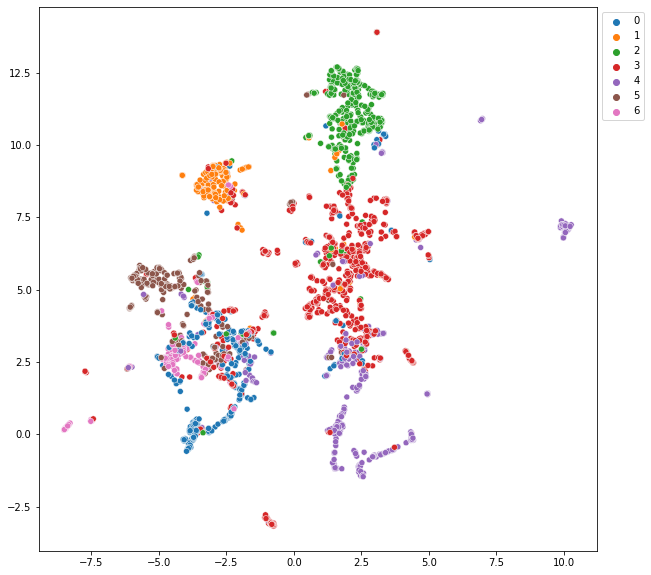

In [15]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=embd.T[0], y=embd.T[1], hue=data.y.cpu().numpy(), palette=palette)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.savefig("umap_embd_sage.png", dpi=120)

In [16]:
def get_synonyms(word):
    synsets = wn.synsets(word)
    lemma_names = []
    for synset in synsets:
        for lemma in synset.lemma_names():
            spaced_lemma = lemma.replace("_", " ")
            lemma_names.append(spaced_lemma)
    return list(set(lemma_names))

In [17]:
get_synonyms("president")

['chairwoman',
 'Chief Executive',
 'chairman',
 'prexy',
 'President',
 'President of the United States',
 'United States President',
 'chair',
 'chairperson',
 'president']

In [18]:
def clean_abstract(abstract):
    return abstract.replace("\n", "").replace("\t", "")


def clean_title(title):
    return re.sub(r"[()]", "", title)


abstracts_list = df["Abstract"].to_list()
titles_list = df["EntryTitle"].to_list()

abstracts_list = list(map(lambda x: clean_abstract(x), abstracts_list))
titles_list = list(map(lambda x: clean_title(x), titles_list))

In [19]:
def tokenize(text):
    return word_tokenize(re.sub(r"[()]", "", text.lower()))


tokenized_abstracts_list = [tokenize(abstract) for abstract in abstracts_list]
tokenized_titles_list = [tokenize(title) for title in titles_list]
tokenized_text_list = tokenized_abstracts_list + tokenized_titles_list
tokenized_text = [token for tokens_list in tokenized_text_list for token in tokens_list]
frequency_dict = dict(Counter(tokenized_text).most_common())

In [20]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=tokenized_text_list, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [21]:
from sklearn.decomposition import IncrementalPCA  # inital reduction
from sklearn.manifold import TSNE  # final reduction


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    import plotly.graph_objs as go
    from plotly.offline import init_notebook_mode, iplot, plot

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import random

    import matplotlib.pyplot as plt

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

/Users/xavierevans/nasa/environment/miniforge3/envs/nasa/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/xavierevans/nasa/environment/miniforge3/envs/nasa/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [22]:
tokens = list(set(frequency_dict.keys()))
len(tokens)

9743

In [23]:
alnum_tokens = list(filter(lambda x: x.isalnum(), tokens))
token2pygid = {token: pygid for pygid, token in dict(enumerate(alnum_tokens)).items()}

In [24]:
from itertools import permutations

alnum_tokens_permutations = list(permutations(alnum_tokens, 2))
alnum_tokens_permutations[:5]

[('highest', 'oi'),
 ('highest', 'white'),
 ('highest', 'perpendicular'),
 ('highest', 'v19'),
 ('highest', 'weeks')]

In [25]:
from numpy.linalg import norm


def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (norm(v1) * norm(v2))

In [26]:
pygid_tuples_list = []

perms_count = len(alnum_tokens_permutations)
ctr = 1

for source, target in alnum_tokens_permutations:
    l1, l2 = model.wv[source], model.wv[target]
    v1, v2 = np.array(l1), np.array(l2)
    cosine = cosine_similarity(v1, v2)
    # print(f"{ctr}/{perms_count}", cosine)
    ctr += 1
    pygid_tuple = source, target, cosine
    pygid_tuples_list.append(pygid_tuple)

pygid_tuples_list

[('highest', 'oi', -0.02535224),
 ('highest', 'white', 0.17846823),
 ('highest', 'perpendicular', -0.04779656),
 ('highest', 'v19', 0.38027108),
 ('highest', 'weeks', 0.090700656),
 ('highest', 'issues', 0.23806939),
 ('highest', 'hlml', 0.27693543),
 ('highest', 'wildfires', 0.3078937),
 ('highest', 'skies', -0.085238025),
 ('highest', 'geographic', 0.29570964),
 ('highest', '159', 0.43506962),
 ('highest', 'supported', 0.26706892),
 ('highest', 'referenced', 0.24419178),
 ('highest', 'induce', 0.318859),
 ('highest', 'utilized', 0.21786292),
 ('highest', 'enso', 0.20902973),
 ('highest', 'omno2g', 0.45540825),
 ('highest', 'hyperspectral', 0.15632002),
 ('highest', 'rejected', 0.23424928),
 ('highest', 'barksdale', 0.32327604),
 ('highest', 'eht', 0.3382499),
 ('highest', 'n2o5', 0.50640786),
 ('highest', '12432', 0.20581205),
 ('highest', 'km2', 0.15036222),
 ('highest', 'ellipsoid', 0.38911775),
 ('highest', 'liang', 0.41617236),
 ('highest', 'surrounded', 0.3764023),
 ('highest', 

In [43]:
with open('/users/xavierevans/nasa/notebooks/list.txt', 'w') as fp:
    for edge in pygid_tuples_list:
        fp.write(f"{edge[0]}, {edge[1]}, {edge[2]}")
    print('Done')

Done


In [27]:
syn_rels = []
synonyms = set()

for token in token2pygid.keys():
    synset = get_synonyms(token)
    for syn in synset:
        if syn not in synonyms and syn not in token2pygid.keys():
            synonyms.add(syn)
        syn_rels.append((token, syn, 1))

In [28]:
{val: key for key, val in token2pygid.items()}[6052]

'disorganized'

In [29]:
syn_ids = range(len(synonyms))
shift = len(token2pygid)
syn_ids = list(map(lambda x: x + shift, syn_ids))
synon2pygid = dict(zip(synonyms, syn_ids))

In [30]:
token2pygid.update(synon2pygid)

In [31]:
token2pygid['summertime']

16974

In [32]:
for syn_rel in syn_rels:
    if syn_rel[0] == syn_rel[1]:
        syn_rels.remove(syn_rel)

In [33]:
syn_rels[:5]

[('highest', 'eminent', 1),
 ('highest', 'mellow', 1),
 ('highest', 'gamey', 1),
 ('highest', 'high', 1),
 ('highest', 'gamy', 1)]

In [34]:
intergroup = pygid_tuples_list
intragroup = syn_rels

rels = intergroup + intragroup

In [35]:
for index, edge_tuple in enumerate(rels):
    rels[index] = (token2pygid[edge_tuple[0]], token2pygid[edge_tuple[1]], edge_tuple[2])

In [36]:
over_min = []
for rel in rels:
    if rel[2] > 0.8:
        over_min.append(rel)

In [37]:
len(over_min)

508861

In [38]:
import networkx as nx

graph = nx.Graph()

for source, target, weight in over_min:
    graph.add_edge(source, target, weight=weight)

In [44]:
from node2vec import Node2Vec
import networkx as nx

node2vec = Node2Vec(graph, dimensions=5, walk_length=3, num_walks=2, workers=2)

Generating walks (CPU: 2): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


In [47]:
model = node2vec.fit(window=10, min_count=1)

In [68]:
model.wv[token2pygid['rain']]

array([-0.11139096,  0.08469235, -0.06820372,  0.16347183, -0.14645207],
      dtype=float32)

In [82]:
embeddings = []

for token in alnum_tokens:
    embeddings.append(list(model.wv[token2pygid[token]]) + [token])

In [84]:
umap.UMAP().fit_transform([e[:2] for e in embeddings])

array([[ 4.916322  ,  8.665321  ],
       [-4.196776  , -1.7402147 ],
       [ 6.5743833 , 13.63907   ],
       ...,
       [-1.0468087 , -1.6549064 ],
       [-1.494115  , -0.32213837],
       [-2.6628957 , -1.0309477 ]], dtype=float32)

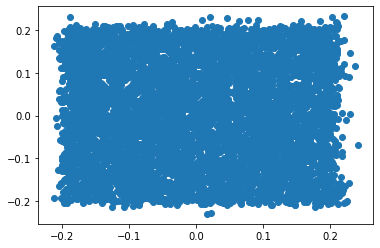

In [81]:
plt.scatter([e[0] for e in embeddings], [e[1] for e in embeddings])

In [ ]:
BATCH_SIZE = 1024
BUFFER_SIZE = 10000
dataset = tf.data.Dataset.from_tensor_slices(((targets, contexts), labels))
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
print(dataset)

<BatchDataset shapes: (((1024,), (1024, 5)), (1024, 5)), types: ((tf.int64, tf.int64), tf.int64)>


In [ ]:
dataset = dataset.cache().prefetch(buffer_size=AUTOTUNE)
print(dataset)

<PrefetchDataset shapes: (((1024,), (1024, 5)), (1024, 5)), types: ((tf.int64, tf.int64), tf.int64)>


In [ ]:
num_ns = 4


class Word2Vec(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim):
        super(Word2Vec, self).__init__()
        self.target_embedding = Embedding(
            vocab_size, embedding_dim, input_length=1, name="w2v_embedding"
        )
        self.context_embedding = Embedding(
            vocab_size, embedding_dim, input_length=num_ns + 1
        )

    def call(self, pair):
        target, context = pair
        # target: (batch, dummy?)  # The dummy axis doesn't exist in TF2.7+
        # context: (batch, context)
        if len(target.shape) == 2:
            target = tf.squeeze(target, axis=1)
        # target: (batch,)
        word_emb = self.target_embedding(target)
        # word_emb: (batch, embed)
        context_emb = self.context_embedding(context)
        # context_emb: (batch, context, embed)
        dots = tf.einsum("be,bce->bc", word_emb, context_emb)
        # dots: (batch, context)
        return dots

In [ ]:
def custom_loss(x_logit, y_true):
    return tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=y_true)

In [ ]:
embedding_dim = 128
word2vec = Word2Vec(vocab_size, embedding_dim)
word2vec.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [ ]:
word2vec.fit(dataset, epochs=20, callbacks=[tensorboard_callback])

Epoch 1/20
1124/1124 [==============================] - 6s 5ms/step - loss: 0.3726 - accuracy: 0.9116
Epoch 2/20
1124/1124 [==============================] - 5s 4ms/step - loss: 0.1591 - accuracy: 0.9445
Epoch 3/20
1124/1124 [==============================] - 5s 4ms/step - loss: 0.1205 - accuracy: 0.9582
Epoch 4/20
1124/1124 [==============================] - 5s 4ms/step - loss: 0.0899 - accuracy: 0.9698
Epoch 5/20
1124/1124 [==============================] - 4s 4ms/step - loss: 0.0685 - accuracy: 0.9780
Epoch 6/20
1124/1124 [==============================] - 5s 4ms/step - loss: 0.0538 - accuracy: 0.9835
Epoch 7/20
1124/1124 [==============================] - 5s 4ms/step - loss: 0.0439 - accuracy: 0.9870
Epoch 8/20
1124/1124 [==============================] - 5s 4ms/step - loss: 0.0372 - accuracy: 0.9891
Epoch 9/20
1124/1124 [==============================] - 5s 4ms/step - loss: 0.0327 - accuracy: 0.9902
Epoch 10/20
1124/1124 [==============================] - 4s 4ms/step - loss: 0.029

In [ ]:
#docs_infra: no_execute
%tensorboard - -logdir logs


In [ ]:
weights = word2vec.get_layer("w2v_embedding").get_weights()[0]
vocab = vectorize_layer.get_vocabulary()

In [ ]:
weights[0]

array([-0.03287204, -0.03907069, -0.01422443, -0.0356672 , -0.04919846,
       -0.04731274,  0.03843823,  0.02492429, -0.02640213, -0.03607573,
       -0.01933904, -0.03875057,  0.04251739,  0.00832983,  0.01815143,
        0.01255972, -0.04051004,  0.00622667, -0.02863535,  0.04946453,
        0.01404561, -0.0243757 ,  0.01828137, -0.02356662,  0.03655574,
       -0.03275815, -0.04319328,  0.0326927 ,  0.03815712, -0.01023272,
        0.04049269, -0.01133918, -0.04016428,  0.0268212 , -0.03231418,
       -0.01760091,  0.03571286,  0.02952283, -0.00177857,  0.01072828,
        0.04125388, -0.03515597, -0.04924082,  0.0371618 ,  0.03658595,
        0.01662097,  0.00475169,  0.03454572, -0.02570435,  0.01572746,
        0.00769993, -0.01240122, -0.01986367,  0.02059605, -0.01247591,
        0.04354253,  0.01063235,  0.00564455, -0.04930284,  0.00399569,
       -0.00138352,  0.0086027 , -0.04158341, -0.03211465, -0.02691205,
       -0.01660279, -0.04899112,  0.02810918, -0.0346344 ,  0.00

In [ ]:
import umap.umap_ as umap

embd = umap.UMAP().fit_transform(weights)

/opt/anaconda3/envs/cs109b/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
embd.shape

(9745, 2)

In [ ]:
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


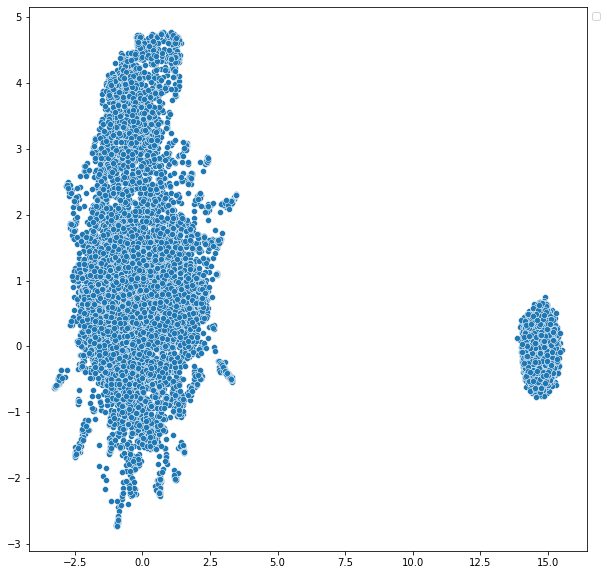

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=embd.T[0], y=embd.T[1])
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

In [1]:
df

NameError: name 'df' is not defined